    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

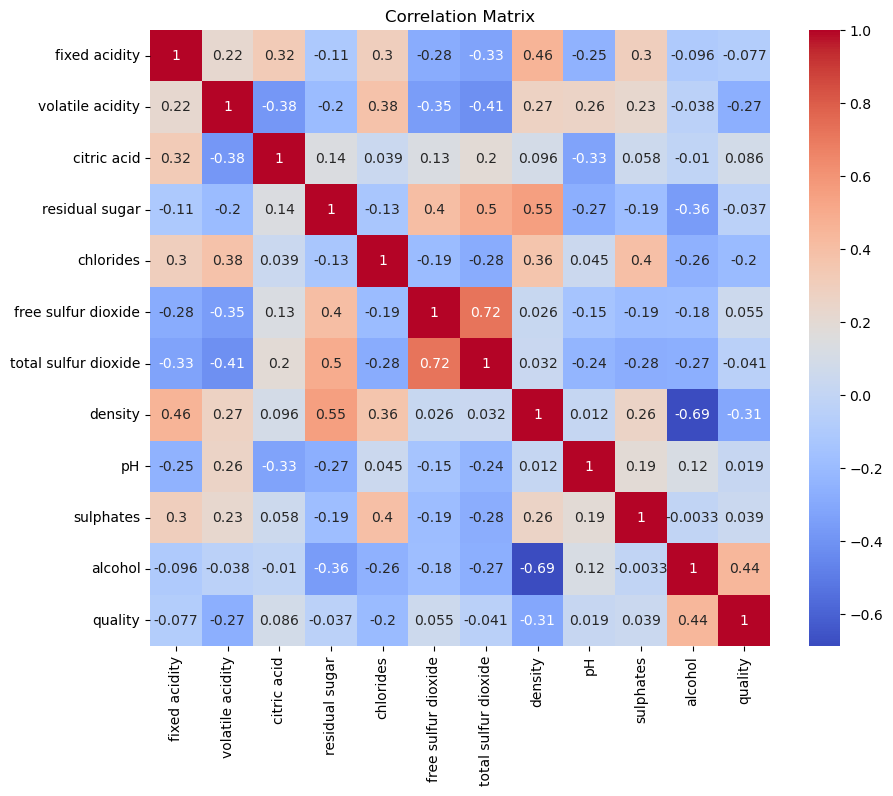

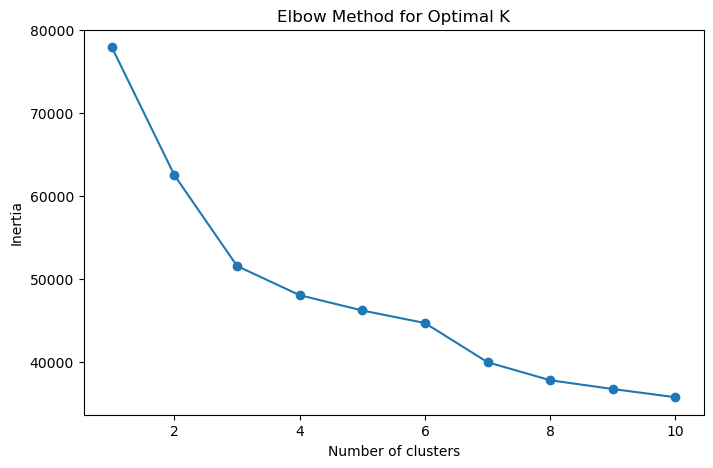

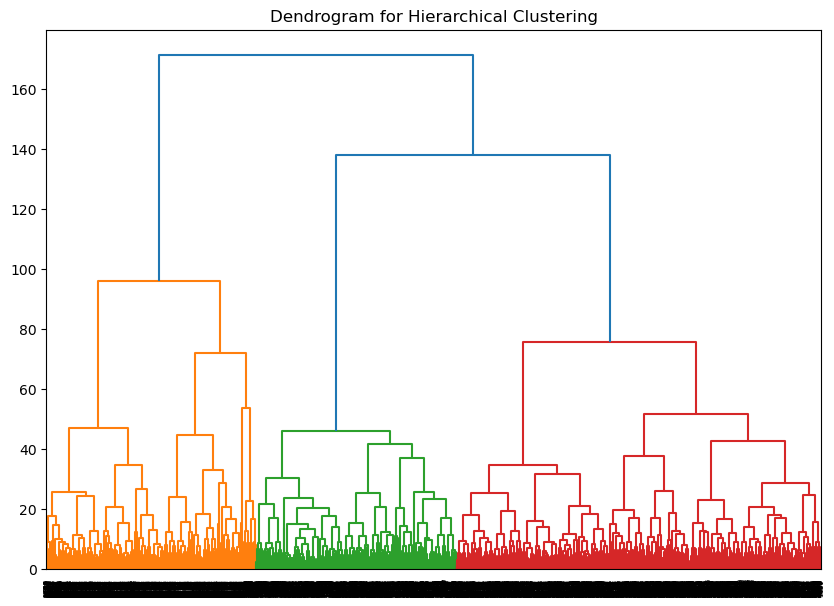

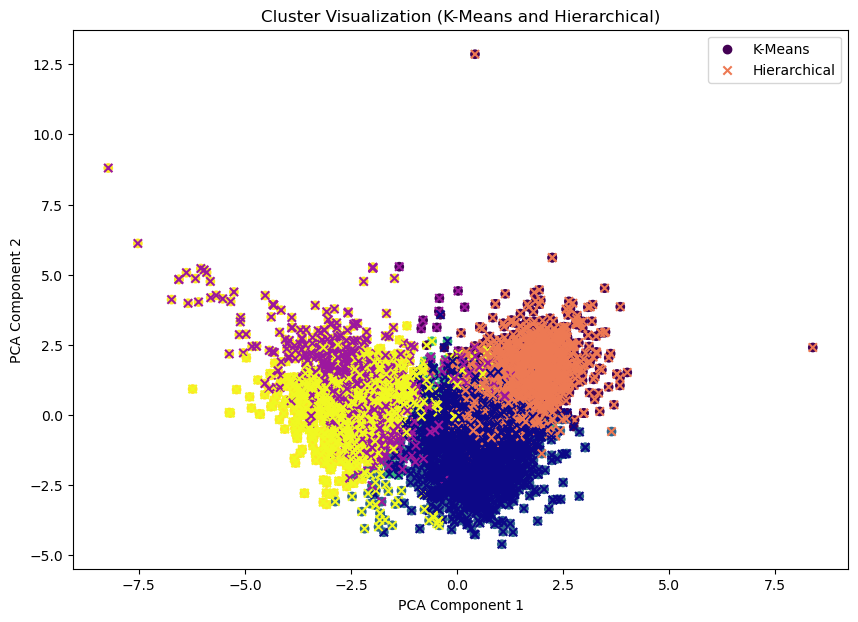

                fixed acidity  volatile acidity  citric acid  residual sugar  \
KMeans_Cluster                                                                 
0                    6.973717          0.280012     0.359883       11.917103   
1                    6.601555          0.277513     0.322571        3.524865   
2                    6.980412          0.277283     0.318703        3.681389   
3                    8.393394          0.537602     0.270967        2.564652   

                chlorides  free sulfur dioxide  total sulfur dioxide  \
KMeans_Cluster                                                         
0                0.051127            47.122011            173.444513   
1                0.037016            31.436785            113.569536   
2                0.049178            27.205282            125.545918   
3                0.089214            15.546784             46.332684   

                 density        pH  sulphates    alcohol   quality  \
KMeans_Cluster  

In [19]:
# 1. Load and Explore the Data
import pandas as pd
import seaborn as sns 

# Load the dataset
data = pd.read_csv('winequalityN.csv')

# Preview the first few rows
print(data.head())
import pandas as pd


# Step 1: Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

# Step 2: Drop or encode non-numeric columns
# If these are identifiers (e.g., 'CustomerID'), drop them
data = data.drop(columns=non_numeric_columns)

# Step 3: Fill any remaining missing values if necessary
data.fillna(data.mean(), inplace=True)

# Step 4: Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Now you can proceed with clustering (K-Means, Hierarchical Clustering, etc.)

# Check for general information and summary statistics
print(data.info())
print(data.describe())

# 2. Handling Missing Values
# Check for missing values
print(data.isnull().sum())

# Option 1: Drop missing values
data.dropna(inplace=True)

# Option 2: Fill missing values with the mean
data.fillna(data.mean(), inplace=True)

# 3. Standardize the Data
from sklearn.preprocessing import StandardScaler

# Standardize the data (excluding any non-numeric columns if needed)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 4. Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(data_scaled, columns=data.columns).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 5. Applying K-Means Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method to determine optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Fit the K-Means model with optimal clusters (e.g., if the elbow appears at K=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

# 6. Applying Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# Plot the Dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Hierarchical Clustering")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.show()

# Fit Hierarchical Clustering with optimal number of clusters (e.g., based on dendrogram)
hierarchical_clustering = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
data['Hierarchical_Cluster'] = hierarchical_clustering.fit_predict(data_scaled)

# 7. Visualizing the Clusters
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['KMeans_Cluster'], cmap='viridis', marker='o', label='K-Means')
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['Hierarchical_Cluster'], cmap='plasma', marker='x', label='Hierarchical')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization (K-Means and Hierarchical)')
plt.legend()
plt.show()

# 8. Analyze and Interpret the Clusters
# Mean values of features in each K-Means cluster
print(data.groupby('KMeans_Cluster').mean())

# Mean values of features in each Hierarchical cluster
print(data.groupby('Hierarchical_Cluster').mean())
